# Normality of Residuals

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats

# Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# Pilih fitur dan target
X = df[['MedInc', 'AveRooms', 'HouseAge']]
y = df['MedHouseVal']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model regresi
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan hitung residual
y_pred = model.predict(X_test)
residuals = y_test - y_pred

In regression, a residual is the difference between the actual (observed) value and the predicted value from your model.

Residual = 𝑦𝑖 ​− 𝑦^𝑖

where:

𝑦𝑖 = the actual value (from your data)

𝑦^𝑖 = the predicted value (from your regression model)

💡 Intuitive Meaning

Residuals tell us how far off the model’s prediction is for each data point.
* If the residual = 0, the model predicted perfectly.
* If the residual = positive, the model underpredicted (actual is higher).
* If the residual = negative, the model overpredicted (actual is lower).

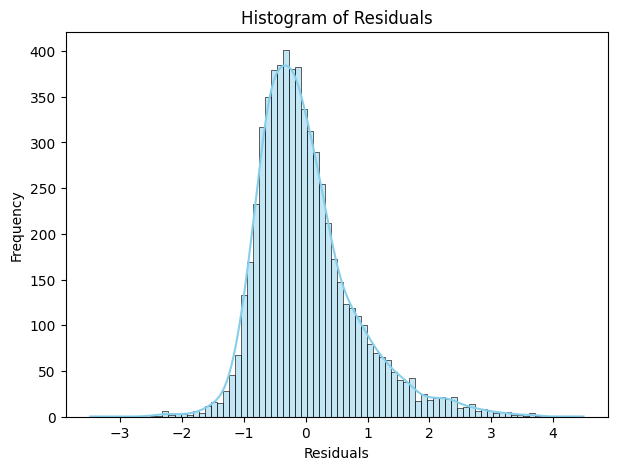

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Q-Q Plot (Quantile–Quantile)

1️⃣ What is a Quantile?

A quantile is a cut-off point dividing the distribution into equal-probability segments.
For instance, the 25th percentile (first quartile) is the value below which 25% of data fall.

2️⃣ How the Q–Q Plot Works

The x-axis represents theoretical quantiles from a normal distribution.

The y-axis represents sample quantiles from your residuals.

If residuals are normally distributed, the points will lie close to a straight diagonal line.

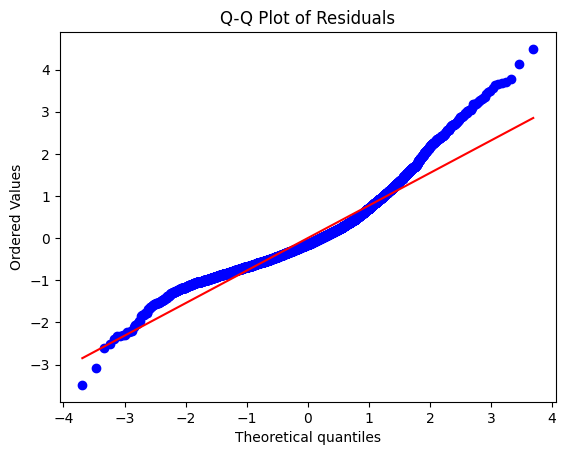

In [ ]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

## Shapiro–Wilk Test

📌 Propose

To measure how close the residual distribution is to the normal distribution. It is very commonly used for small to medium samples (n < 5000)

🧮 Basic Concept

This test compares the sequence of residuals with the expected values from the normal distribution. The statistic is based on the correlation between the actual data and the data ordered according to the normal distribution.

In [ ]:
shapiro_test = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic:.3f}, p-value={shapiro_test.pvalue:.3f}")

Shapiro-Wilk Test: Statistic=0.931, p-value=0.000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6192.
  res = hypotest_fun_out(*samples, **kwds)


## Kolmogorov–Smirnov (K–S) Test

📌 Propose

Testing whether the distribution of residual samples significantly differs from the theoretical normal distribution.

🧮  Basic Concept

Measuring the maximum distance between the empirical residual cumulative distribution function (CDF) and the theoretical normal distribution CDF.

In [ ]:
ks_test = stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print(f"Kolmogorov–Smirnov Test: Statistic={ks_test.statistic:.3f}, p-value={ks_test.pvalue:.3f}")

Kolmogorov–Smirnov Test: Statistic=0.091, p-value=0.000


## Jarque–Bera (J–B) Test

📌 Propose

Test normality by examining the skewness and kurtosis of the residuals

🧮 Basic Concept

A normal distribution has:
Skewness = 0 (simetris)
Kurtosis = 3 (standar)

In [ ]:
jb_test = stats.jarque_bera(residuals)
print(f"Jarque–Bera Test: Statistic={jb_test.statistic:.3f}, p-value={jb_test.pvalue:.3f}")

Jarque–Bera Test: Statistic=2641.226, p-value=0.000


🧩 Test Interpretation:

H₀: Residuals are normally distributed

H₁: Residuals are not normalIf p-value < 0.05, then reject H₀ → residuals are not normal.

| Purpose                                              | Is Normality Required? | Why                                                                                                |
| ---------------------------------------------------- | ---------------------- | -------------------------------------------------------------------------------------------------- |
| **Fitting the regression line (making predictions)** | ❌ **No**               | Linear regression *minimizes squared errors*, not dependent on residual normality.                 |
| **Hypothesis testing (p-values, t-tests, F-tests)**  | ✅ **Yes**              | These tests *assume* that residuals are normally distributed.                                      |
| **Large sample (n > 30–50)**                         | 🔸 **Less important**  | The **Central Limit Theorem** makes test statistics approximately normal even if residuals aren’t. |


You can still run regression even if residuals are not normal.

But if your goal is to interpret coefficients statistically (like “is X₁ significant?”), then normality matters.

If residuals are strongly non-normal, you can:
* Transform your dependent variable (e.g., log(Y), √Y).
* Use a robust regression or non-parametric method.
* Check for outliers that might distort residuals.

# Homoscedasticity

🎯 Learning Objectives

Students should be able to:
* Understand the concept and importance of homoscedasticity.
* Explain the mathematical basis of Breusch–Pagan and White’s tests.
* Apply both visual and statistical tests using Python.
* Interpret and report the results correctly.

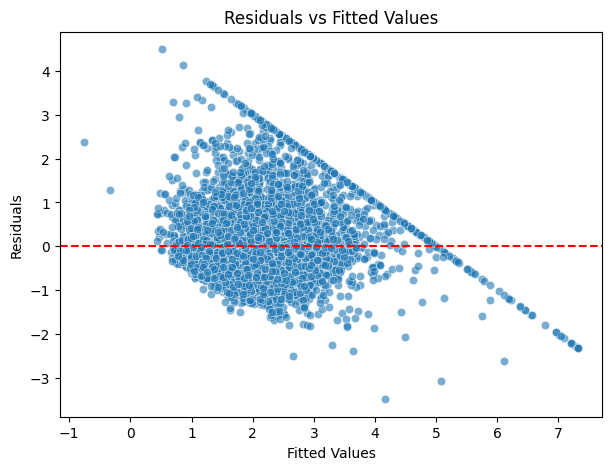

In [ ]:
# Residual plot
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

| Term                        | Meaning                                 | Formula                      | Purpose                                                  |
| --------------------------- | --------------------------------------- | ---------------------------- | -------------------------------------------------------- |
| **Fitted Value**            | Model’s predicted output                | ( \hat{y}_i = b_0 + b_1x_i ) | Represents what the model “thinks” the outcome should be |
| **Residual**                | Difference between actual and predicted | ( e_i = y_i - \hat{y}_i )    | Measures how far off the prediction is                   |
| **Residual vs Fitted Plot** | Visualization                           | —                            | Checks linearity & homoscedasticity                      |


⚠️ What this means:

Non-linearity or model misspecification

* The residuals are not centered randomly around zero — there’s a visible trend.
* Suggests the model doesn’t fully capture the relationship between predictors and target.
* A linear model might not be appropriate — you might need transformations or interaction terms.

Heteroscedasticity (non-constant variance)
* The residuals have different spreads across fitted values (larger variance for small fitted values, smaller for large fitted values).
* This violates the homoscedasticity assumption of linear regression.
* It can make coefficient estimates inefficient and bias standard errors.

## Breusch–Pagan test

In [ ]:
# Breusch–Pagan test
X_sm = sm.add_constant(X_test)
bp_test = het_breuschpagan(residuals, X_sm)
labels = ['LM Stat', 'LM p-value', 'F Stat', 'F p-value']
print(dict(zip(labels, bp_test)))

{'LM Stat': np.float64(126.10147953425276), 'LM p-value': np.float64(3.742103013874411e-27), 'F Stat': np.float64(42.87993239172765), 'F p-value': np.float64(2.0331131240088795e-27)}


| Key                               | Meaning                                                  | Interpretation                                         |
| --------------------------------- | -------------------------------------------------------- | ------------------------------------------------------ |
| **LM Stat (Lagrange Multiplier)** | The χ² test statistic based on the auxiliary regression. | Large value → stronger evidence of heteroscedasticity. |
| **LM p-value**                    | Probability of observing the LM statistic under H₀.      | If p < 0.05 → reject H₀ (heteroscedasticity present).  |
| **F Stat**                        | F-test version of the same hypothesis.                   | Should lead to same conclusion as LM Stat.             |
| **F p-value**                     | Probability under H₀ for the F-statistic.                | p < 0.05 → reject H₀.                                  |


## White’s test

In [ ]:
# White’s test
white_test = het_white(residuals, X_sm)
labels = ['LM Stat', 'LM p-value', 'F Stat', 'F p-value']
print(dict(zip(labels, white_test)))

{'LM Stat': np.float64(211.34941782266233), 'LM p-value': np.float64(1.376564083550744e-40), 'F Stat': np.float64(24.27387535532458), 'F p-value': np.float64(2.5754058068970004e-41)}


| Metric                            | Meaning                                                                                        | Interpretation                                                                      |
| :-------------------------------- | :--------------------------------------------------------------------------------------------- | :---------------------------------------------------------------------------------- |
| **LM Stat (Lagrange Multiplier)** | Chi-square test statistic based on an auxiliary regression of squared residuals on predictors. | The value 211.35 is very large — indicates strong deviation from constant variance. |
| **LM p-value**                    | Probability that such a large LM Stat would occur under the null hypothesis.                   | (1.38\times10^{-40}) is essentially 0 → reject (H_0).                               |
| **F Stat**                        | Alternative version of the same test using F-distribution.                                     | 24.27, also very large.                                                             |
| **F p-value**                     | Probability under (H_0) for the F-statistic.                                                   | (2.58\times10^{-41}) → extremely small → reject (H_0).                              |


🧩 Statistical Decision

Null hypothesis (H₀): Residuals are homoscedastic (constant variance).

Alternative hypothesis (H₁): Residuals are heteroscedastic (non-constant variance).

# Error Independence

🎯 Learning Objectives

Students should be able to:
* Understand the concept and importance of residual independence in regression.
* Explain the mathematical basis of autocorrelation and the Durbin–Watson statistic.
* Apply graphical and formal statistical tests in Python.
* Interpret and address model violations (autocorrelation).

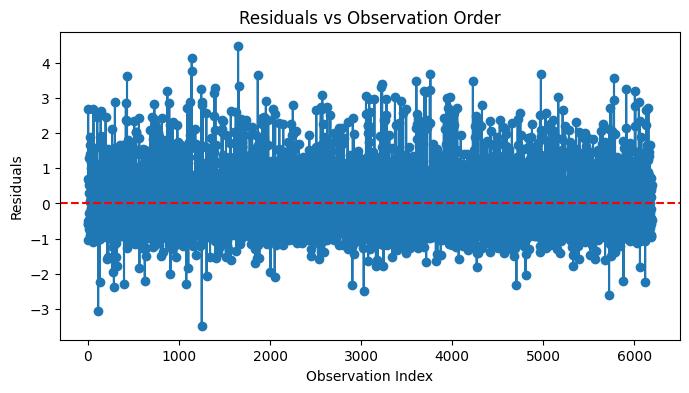

In [ ]:
# Plot residuals vs observation order
plt.figure(figsize=(8,4))
plt.plot(residuals.values, marker='o', linestyle='-')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Observation Order")
plt.xlabel("Observation Index")
plt.ylabel("Residuals")
plt.show()

This plot is used to check the independence of errors (residuals) —
in other words, whether residuals are random over time or sequence.

This is especially important when your data has a time or spatial order, like:
* Time series (e.g., monthly sales)
* Observations collected sequentially (e.g., experiments, surveys)

| Aspect             | Description                                           |
| ------------------ | ----------------------------------------------------- |
| **What it checks** | Whether residuals are independent across observations |
| **Ideal result**   | Random pattern, no trend                              |
| **Common problem** | Autocorrelation (residuals follow a pattern or trend) |


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

## Durbin–Watson Test

In [ ]:
# Durbin–Watson Test
dw_stat = durbin_watson(residuals)
print(f"Durbin–Watson statistic: {dw_stat:.3f}")

Durbin–Watson statistic: 2.003


2.003 : Evidence of no autocorrelation

* DW ≈ 2 → no autocorrelation
* DW < 1.5 → positive autocorrelation
* DW > 2.5 → negative autocorrelation

| Test          | Purpose                              | Formula                                                                        | Decision Rule        | Notes                            |
| ------------- | ------------------------------------ | ------------------------------------------------------------------------------ | -------------------- | -------------------------------- |
| Durbin–Watson | Detects first-order autocorrelation  | (DW = \frac{\sum (\varepsilon_t - \varepsilon_{t-1})^2}{\sum \varepsilon_t^2}) | ≈2 → independent     | Simple and widely used           |
| Ljung–Box     | Detects higher-order autocorrelation | Based on Q-statistic                                                           | p < 0.05 → reject H₀ | Generalized test for time series |


# Linearity of Relationship

🎯 Learning Objectives

Students should be able to:
* Understand the concept and importance of linearity in regression analysis.
* Explain the mathematical foundation of the linearity assumption.
* Diagnose linearity using visual and statistical methods.
* Apply corrective measures if nonlinearity is detected.

In [ ]:
from statsmodels.graphics.regressionplots import plot_partregress_grid

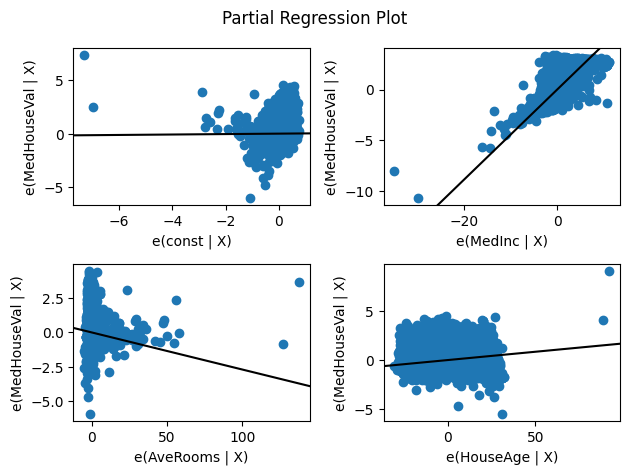

In [ ]:
# --- Partial Residual (Component + Residual) Plot ---
X_sm = sm.add_constant(X)
ols_model = sm.OLS(y, X_sm).fit()
fig = plot_partregress_grid(ols_model)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import linear_rainbow

rainbow_stat, rainbow_p = linear_rainbow(ols_model)
print(f"Rainbow Statistic: {rainbow_stat:.3f}")
print(f"p-value: {rainbow_p:.4f}")

Rainbow Statistic: 1.135
p-value: 0.0000


| p-value  | Decision          | Interpretation            |
| -------- | ----------------- | ------------------------- |
| p ≥ 0.05 | Fail to reject H₀ | Linearity holds ✅         |
| p < 0.05 | Reject H₀         | Nonlinear relationship ⚠️ |


In [ ]:
X = df[["MedInc", "AveRooms", "AveOccup", "HouseAge"]]
y = df["MedHouseVal"]

X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     5450.
Date:                Wed, 29 Oct 2025   Prob (F-statistic):               0.00
Time:                        06:33:14   Log-Likelihood:                -24802.
No. Observations:               20640   AIC:                         4.961e+04
Df Residuals:                   20635   BIC:                         4.965e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0314      0.022      1.428      0.1

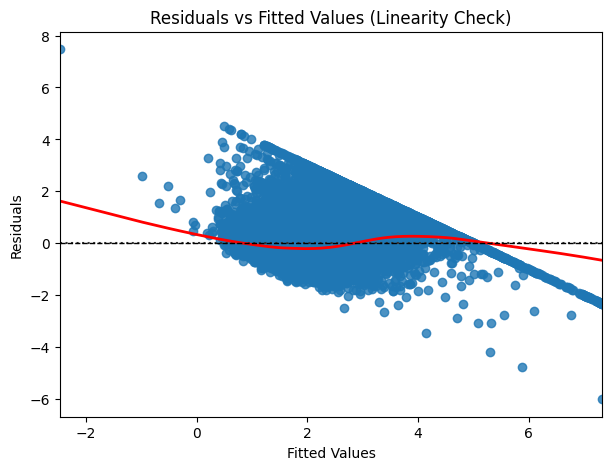

In [ ]:
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(7,5))
sns.residplot(x=fitted, y=residuals, lowess=True,
              line_kws={'color': 'red', 'lw': 2})
plt.axhline(0, color='black', linestyle='--', lw=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (Linearity Check)")
plt.show()

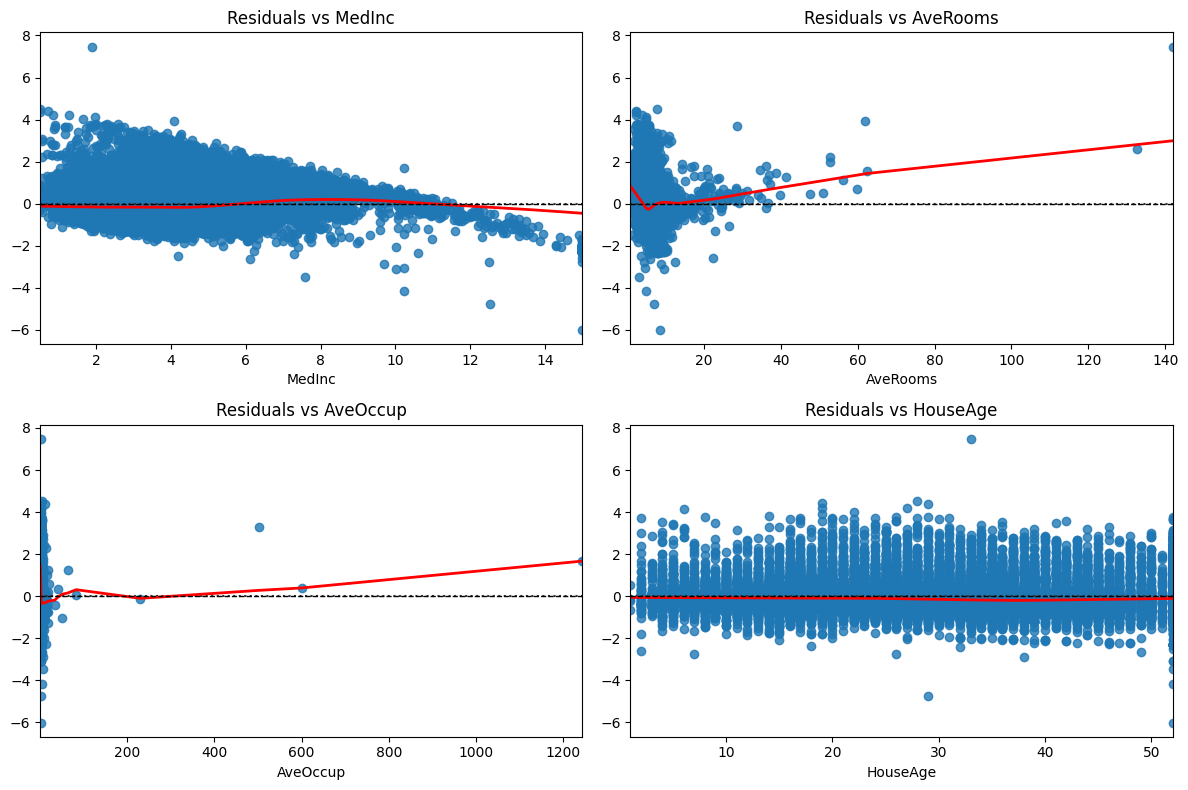

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
cols = ["MedInc", "AveRooms", "AveOccup", "HouseAge"]

for i, col in enumerate(cols):
    sns.residplot(x=df[col], y=residuals, lowess=True, ax=axes[i//2, i%2],
                  line_kws={'color': 'red', 'lw': 2})
    axes[i//2, i%2].set_title(f"Residuals vs {col}")
    axes[i//2, i%2].axhline(0, color='black', linestyle='--', lw=1)

plt.tight_layout()
plt.show()

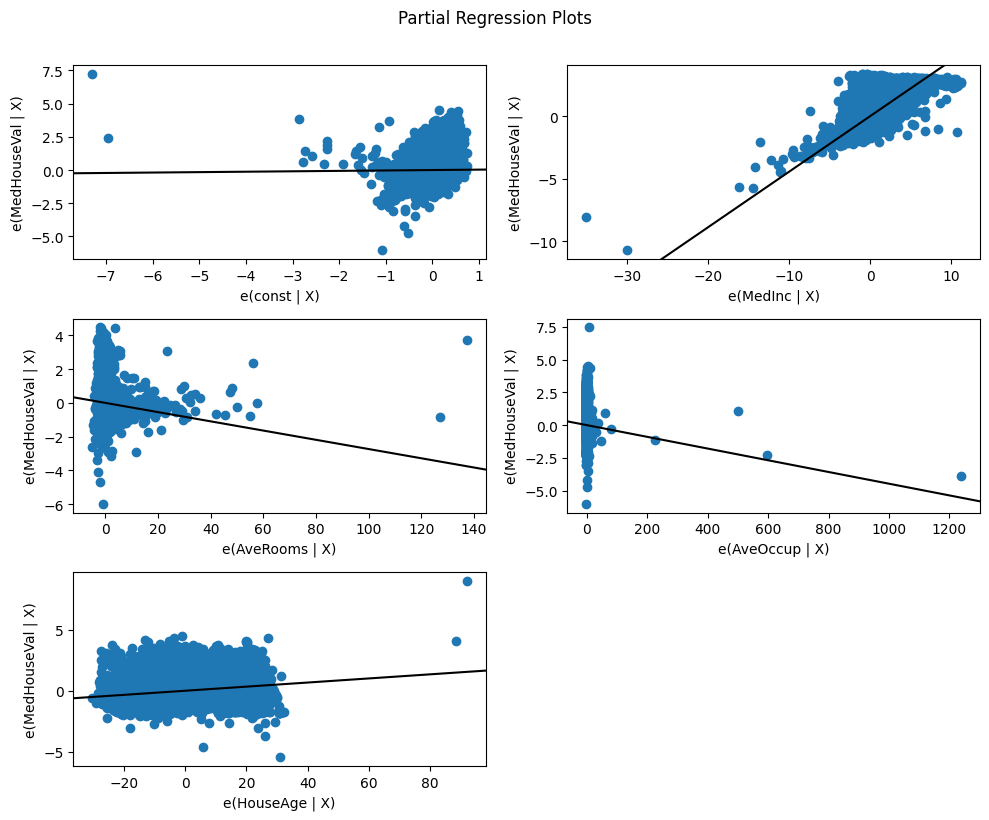

In [ ]:
fig = plt.figure(figsize=(10, 8))
plot_partregress_grid(model, fig=fig)
plt.suptitle("Partial Regression Plots", y=1.02)
plt.show()


In [ ]:
df["MedInc_log"] = np.log(df["MedInc"] + 1)
X2 = sm.add_constant(df[["MedInc_log", "AveRooms", "AveOccup", "HouseAge"]])
model2 = sm.OLS(y, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     4999.
Date:                Wed, 29 Oct 2025   Prob (F-statistic):               0.00
Time:                        06:35:49   Log-Likelihood:                -25250.
No. Observations:               20640   AIC:                         5.051e+04
Df Residuals:                   20635   BIC:                         5.055e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7971      0.031    -58.527      0.0